# Capstone - What Region has the Best Value Wine?

## Introduction/Business Problem
For fellow wine lovers out there, it is totally acceptable to pick a random bottle off the shelf or go with staff picks - but how about trying a data driven approach? In this notebook, I want to explore which region tends to render the which variety the best and with best value, and also to build a recommendation system based on price range and variety.

## Data
Here I will be using the
<a href="https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv">winemag-data-130k-v2.csv</a> dataset from Kaggle.
As described above, we will focus on the following columns:<br /> 
province, points, price & variety

### Initial data observation/inherent limitation
Note that there is concentration of data that is available - mostly from US/France/Italy. It might be no surprise that our recommendation will end up to be from these 3 countries. Hence we will choose to use province instead of country in order to provide slightly more valuable recommendation. There are 707 unique values in variety, we are going to focus on the top 30 variety types, representing around 80% of the full data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df['variety'].nunique()

707

In [6]:
df['variety'].value_counts()[:30].sum()/df.shape[0]

0.8090574051134484

In [7]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

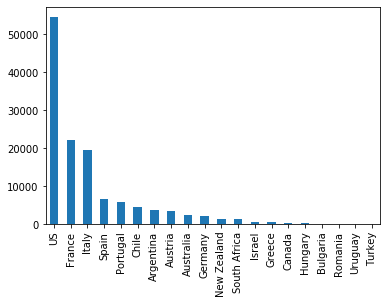

In [8]:
df['country'].value_counts()[:20].plot.bar()

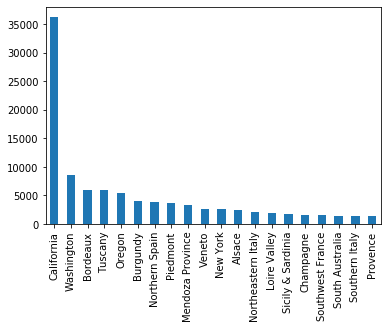

In [9]:
df['province'].value_counts()[:20].plot.bar()